In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
# load the data from csv file to Pandas DataFrame
titanic_data = pd.read_csv('./titanic_train.csv')
titanic_tata1 = pd.read_csv('./titanic_test.csv')

In [5]:
# printing the first 5 rows of the dataframe
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# number of rows and Columns
titanic_data.shape

(891, 12)

In [7]:
# getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# drop the "Cabin" column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [10]:
# replacing the missing values in "Age" column with mean value
# # 'Age' 열의 결측치를 평균값으로 대체
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [11]:
# 'Embarked' 열의 결측치를 최빈값으로 대체
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [12]:
# 'Fare' 열의 결측치를 평균값으로 대체
titanic_data['Fare'].fillna(titanic_data['Fare'].mean(), inplace=True)


In [13]:
# finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [14]:
print(titanic_data['Embarked'].mode()[0])

S


In [15]:
# replacing the missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [16]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
# getting some statistical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [19]:
sns.set()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_7208\1530973340.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Survived', data=titanic_data, palette="Set2")


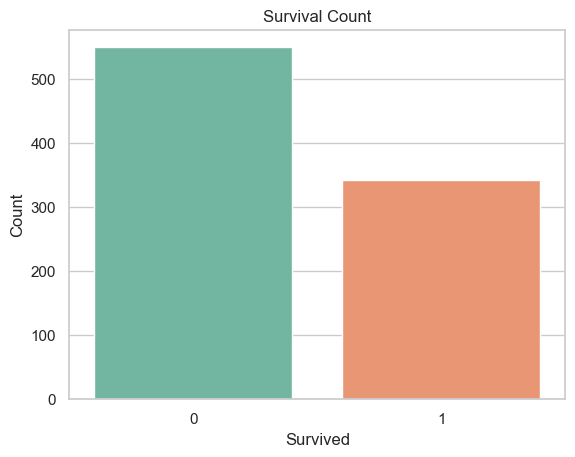

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set Seaborn style
sns.set(style="whitegrid", palette="pastel")

# Create a count plot for Survived column
ax = sns.countplot(x='Survived', data=titanic_data, palette="Set2")

# Add title and labels
ax.set_title('Survival Count')
ax.set_xlabel('Survived')
ax.set_ylabel('Count')

# Display the plot
plt.show()



In [21]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

C:\Users\LEGION\AppData\Local\Temp\ipykernel_7208\3886695652.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Sex', data=titanic_data, palette="Set2")


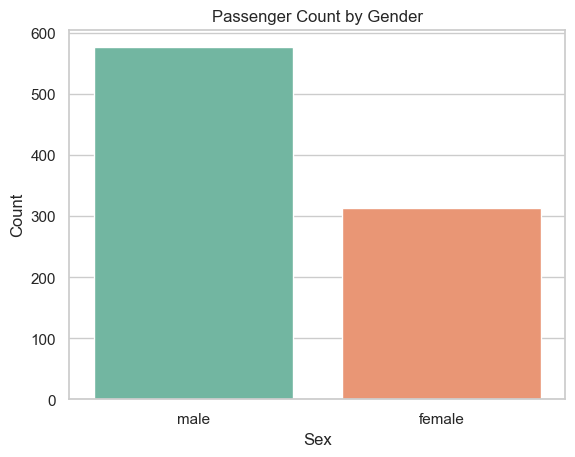

In [22]:
# making a count plot for "Sex" column
#sns.countplot('Sex', data=titanic_data)

# Set Seaborn style
sns.set(style="whitegrid", palette="pastel")

# Create a count plot
ax = sns.countplot(x='Sex', data=titanic_data, palette="Set2")

# Add title and labels
ax.set_title('Passenger Count by Gender')
ax.set_xlabel('Sex')
ax.set_ylabel('Count')

# Display the plot
plt.show()

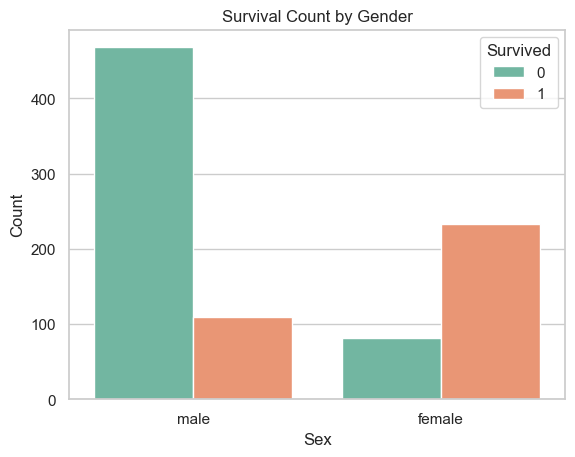

In [23]:
# Set Seaborn style
sns.set(style="whitegrid", palette="pastel")

# 'Survived' 컬럼을 문자열로 변환
titanic_data['Survived'] = titanic_data['Survived'].astype(str)

# Create a count plot for Survived column with hue as Sex
ax = sns.countplot(x='Sex', hue='Survived', data=titanic_data, palette="Set2")

# Add title and labels
ax.set_title('Survival Count by Gender')
ax.set_xlabel('Sex')
ax.set_ylabel('Count')

# Display the plot
plt.show()


C:\Users\LEGION\AppData\Local\Temp\ipykernel_7208\2614218146.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Pclass', data=titanic_data, palette="Set2")


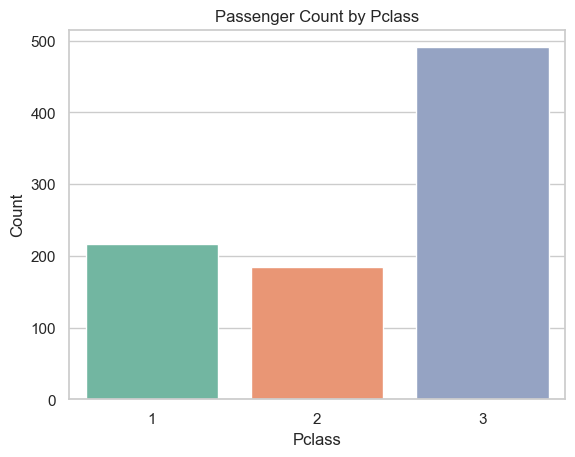

In [24]:
# Seaborn 스타일 설정
sns.set(style="whitegrid", palette="pastel")

# Create a count plot for Pclass column
ax = sns.countplot(x='Pclass', data=titanic_data, palette="Set2")

# Add title and labels
ax.set_title('Passenger Count by Pclass')
ax.set_xlabel('Pclass')
ax.set_ylabel('Count')

# Display the plot
plt.show()


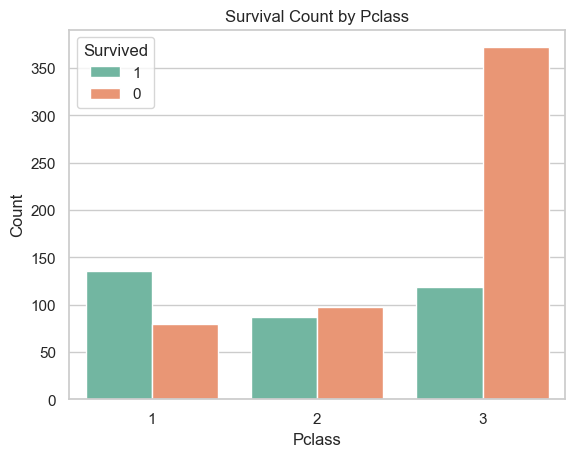

In [25]:
# Seaborn 스타일 설정
sns.set(style="whitegrid", palette="pastel")

# Create a count plot for Pclass column with hue as Survived
ax = sns.countplot(x='Pclass', hue='Survived', data=titanic_data, palette="Set2")

# Add title and labels
ax.set_title('Survival Count by Pclass')
ax.set_xlabel('Pclass')
ax.set_ylabel('Count')

# Display the plot
plt.show()


In [26]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [27]:
titanic_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [28]:
# converting categorical Columns

titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [29]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [30]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [31]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [32]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: object


In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


In [35]:
model = LogisticRegression()

In [36]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

c:\ProgramData\anaconda3\envs\ml-dev\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [38]:
print(X_train_prediction)

['0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '1' '0' '1' '0'
 '0' '0' '0' '0' '1' '0' '0' '1' '0' '0' '1' '0' '1' '1' '0' '0' '1' '0'
 '1' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '1' '0' '1' '0' '1' '0' '0'
 '0' '0' '0' '0' '1' '0' '1' '0' '0' '1' '1' '0' '0' '1' '1' '0' '1' '0'
 '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '1' '0'
 '1' '0' '0' '1' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0' '0' '0' '0' '1'
 '0' '0' '0' '1' '1' '0' '0' '1' '0' '0' '1' '0' '0' '1' '0' '0' '1' '0'
 '1' '0' '1' '0' '1' '0' '1' '1' '1' '1' '1' '1' '0' '0' '1' '1' '1' '0'
 '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0' '0'
 '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '1' '0'
 '1' '0' '1' '1' '1' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '1' '0' '0'
 '0' '1' '1' '0' '1' '0' '0' '0' '0' '0' '1' '1' '0' '1' '1' '1' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '1' '0' '0' '1' '0' '1'
 '1' '1' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0

In [39]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8075842696629213


In [40]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [41]:
print(X_test_prediction)

['0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '1' '0' '0'
 '1' '0' '1' '1' '0' '1' '0' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '1'
 '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0' '1' '0' '0' '0' '0'
 '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0' '0' '1' '0'
 '1' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0' '0' '1' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '1' '0' '1' '0' '0' '1' '0' '1' '1' '0' '1' '1' '0'
 '0' '0' '0' '0' '0' '0' '1' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0'
 '0' '1' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1'
 '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '1' '0'
 '0' '0' '1' '1' '0' '0' '1' '0' '0' '1' '1' '1' '0' '0' '0' '0' '0']


In [42]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7821229050279329
